In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Upload your dataset
uploaded = files.upload()

# Load the CSV into a DataFrame
df = pd.read_csv(list(uploaded.keys())[0])

# Show first few rows
df.head()


Saving mediocre_sales_dataset.csv to mediocre_sales_dataset (1).csv


,Date,Product,Store,Sales
0,2021-01-01,Shampoo,Store_C,141
1,2021-01-01,Soap,Store_A,403
2,2021-01-01,Toothpaste,Store_C,371
3,2021-01-01,Lotion,Store_C,337
4,2021-01-02,Shampoo,Store_A,264


In [3]:
# Check dataset info
df.info()

# Summary statistics for numeric columns
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     400 non-null    object
 1   Product  400 non-null    object
 2   Store    400 non-null    object
 3   Sales    400 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 12.6+ KB


,0
Date,0
Product,0
Store,0
Sales,0


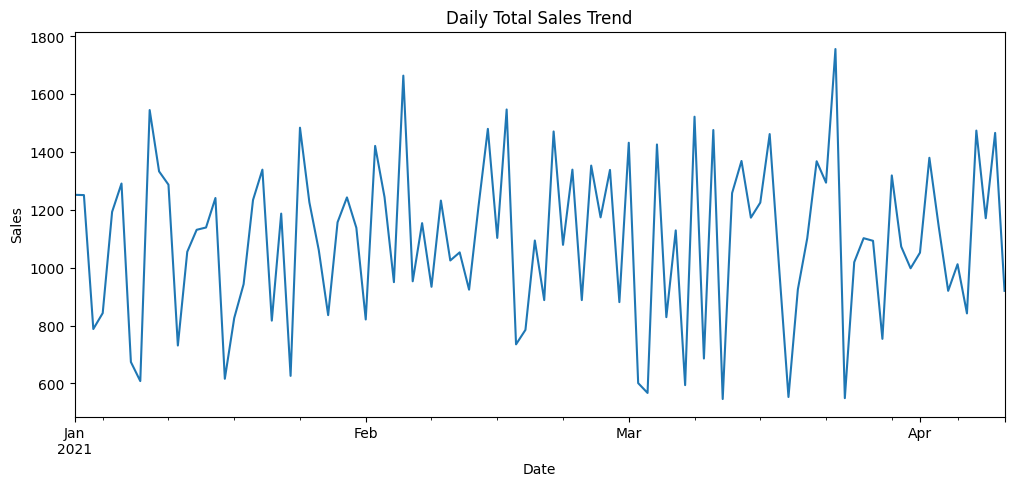

In [4]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Plot total sales over time
plt.figure(figsize=(12,5))
df.groupby('Date')['Sales'].sum().plot()
plt.title("Daily Total Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


Product
Toothpaste    28579
Lotion        27576
Soap          26886
Shampoo       26375
Name: Sales, dtype: int64


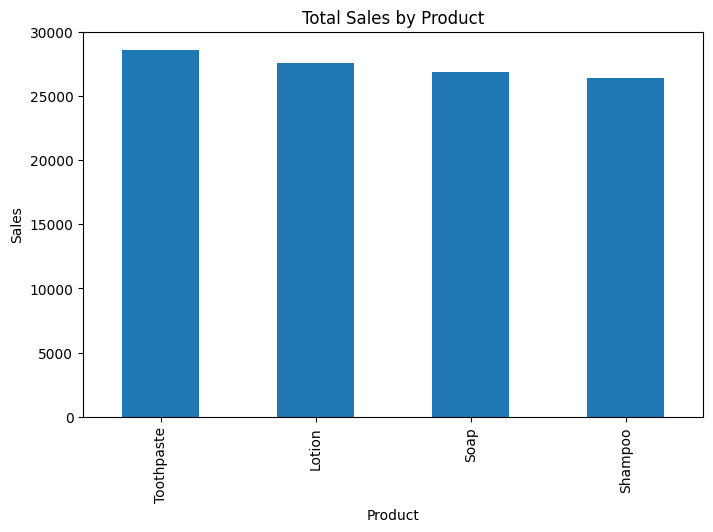

Store
Store_C    39107
Store_A    35504
Store_B    34805
Name: Sales, dtype: int64


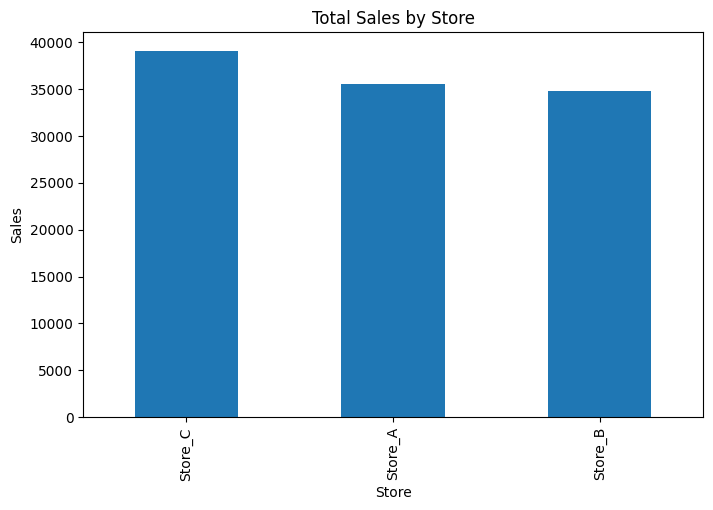

In [5]:
# Total sales by product
product_sales = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)
print(product_sales)

# Plot
product_sales.plot(kind='bar', figsize=(8,5), title='Total Sales by Product')
plt.ylabel('Sales')
plt.show()

# Total sales by store
store_sales = df.groupby('Store')['Sales'].sum().sort_values(ascending=False)
print(store_sales)

store_sales.plot(kind='bar', figsize=(8,5), title='Total Sales by Store')
plt.ylabel('Sales')
plt.show()


In [6]:
# Aggregate total daily sales
daily_sales = df.groupby('Date')['Sales'].sum().reset_index()

# Convert dates to a numeric index for simple regression
daily_sales['Day'] = range(len(daily_sales))
daily_sales.head()


,Date,Sales,Day
0,2021-01-01,1252,0
1,2021-01-02,1251,1
2,2021-01-03,788,2
3,2021-01-04,843,3
4,2021-01-05,1193,4


In [7]:
from sklearn.model_selection import train_test_split

X = daily_sales[['Day']]  # feature: numeric day index
y = daily_sales['Sales']  # target: daily total sales

# 80% train, 20% test (shuffle=False for time-series)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

# MAE
mae = mean_absolute_error(y_test, y_pred)

# RMSE (manual square root)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")


MAE: 203.89, RMSE: 269.72


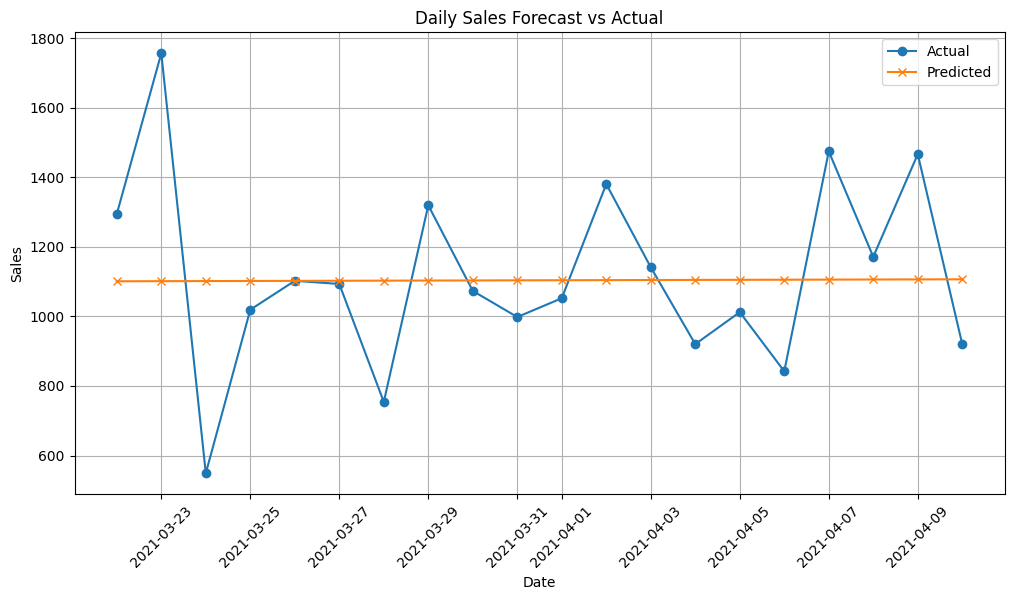

In [11]:
plt.figure(figsize=(12,6))
plt.plot(daily_sales['Date'].iloc[-len(y_test):], y_test, label='Actual', marker='o')
plt.plot(daily_sales['Date'].iloc[-len(y_test):], y_pred, label='Predicted', marker='x')
plt.title("Daily Sales Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [12]:
import numpy as np

# Predict next 7 days
future_days = np.array(range(len(daily_sales), len(daily_sales)+7)).reshape(-1,1)
future_pred = model.predict(future_days)

# Show predicted sales
future_dates = pd.date_range(start=daily_sales['Date'].max() + pd.Timedelta(days=1), periods=7)
future_df = pd.DataFrame({'Date': future_dates, 'Predicted_Sales': future_pred})
print(future_df)


        Date  Predicted_Sales
0 2021-04-11      1106.719937
1 2021-04-12      1107.020886
2 2021-04-13      1107.321835
3 2021-04-14      1107.622785
4 2021-04-15      1107.923734
5 2021-04-16      1108.224684
6 2021-04-17      1108.525633


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
